# Exploring DNN learning with TensorFlow

In this assignment we'll dive a little deeper with a series of hands on exercises to better understand DNN learning with Tensorflow. Remember that if you are taking the class for a certificate we will be asking you questions about the assignment in the test!

We start by setting up the problem for you.

In [10]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np


# Load in fashion MNIST
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Define the base model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)), 
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

def return_label_dict(self):
    label_dict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
    }
    return label_dict



# Normalizing
Neural Networks learn the best when the data is scaled / normalized to fall in a constant range. One practitioners often use is the range [0,1]. How might you do this to the training and test images used here?

*A hint: these images are saved in the standard [RGB](https://www.rapidtables.com/web/color/RGB_Color.html) format*

In [11]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Using these improved images lets compile our model using an adaptive optimizer to learn faster and a categorical loss function to differentiate between the the various classes we are trying to classify. Since this is a very simple dataset we will only train for 5 epochs.

In [12]:
# compile the model
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

# fit the model to the training data
model.fit(training_images, training_labels, epochs=5)

# test the model on the test data
model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4765 - accuracy: 0.8303
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3593 - accuracy: 0.8688
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3240 - accuracy: 0.8813
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2981 - accuracy: 0.8895
Epoch 5/5
313/313 [==============================] - 0s 606us/step - loss: 0.3381 - accuracy: 0.8781


[0.3380940556526184, 0.8780999779701233]

Once it's done training -- you should see an accuracy value at the end of the final epoch. It might look something like 0.8648. This tells you that your neural network is about 86% accurate in classifying the training data. I.E., it figured out a pattern match between the image and the labels that worked 86% of the time. But how would it work with unseen data? That's why we have the test images. We can call ```model.evaluate```, and pass in the two sets, and it will report back the loss for each. This should reach about .8747 or thereabouts, showing about 87% accuracy. Not Bad!

# Model predict
But what did it actually learn? If we inference on the model using ```model.predict``` we get out the following list of values. **What does it represent?**

*A hint: trying running ```print(test_labels[0])```*

Classificatie: [2.5941114e-04 1.6502909e-06 9.9330597e-02 7.3315668e-06 7.9184330e-01
 1.9924911e-07 1.0854977e-01 1.1858667e-08 4.5048023e-06 3.2309526e-06]
Test label: 4


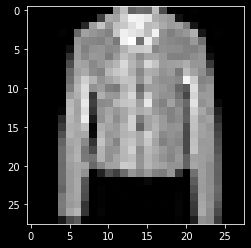

In [20]:
classifications = model.predict(test_images)
print(f'Classificatie: {classifications[10]}')
print(f'Test label: {test_labels[10]}')
checked_image = test_images[10] *255.0
checked_image = np.array(checked_image, dtype='float')
pixels = checked_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

# More neurons per layer
Let's now look at the layers in your model. What happens if you double the number of neurons in the dense layer. What different results do you get for loss, training time etc? Why do you think that's the case? 

In [14]:
NUMBER_OF_NEURONS = 1024

# define the new model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(NUMBER_OF_NEURONS, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# compile fit and evaluate the model again
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4749 - accuracy: 0.8303
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3601 - accuracy: 0.8676
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3208 - accuracy: 0.8810
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2970 - accuracy: 0.8899
Epoch 5/5
313/313 [==============================] - 0s 803us/step - loss: 0.3596 - accuracy: 0.8743


[0.3596394956111908, 0.8743000030517578]

# Adding more layers
Consider the effects of additional layers in the network instead of simply more neurons to the same layer. First update the model to add an additional dense layer into the model between the two existing Dense layers.

In [18]:
YOUR_NEW_LAYER = tf.keras.layers.Dense(512, activation=tf.nn.relu)

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    YOUR_NEW_LAYER,
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

Lets then compile, fit, and evaluate our model. What happens to the error? How does this compare to the original model and the model with double the number of neurons?

In [19]:
# compile fit and evaluate the model again
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4655 - accuracy: 0.8296
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3556 - accuracy: 0.8687
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3203 - accuracy: 0.8812
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2953 - accuracy: 0.8899
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.3895 - accuracy: 0.8674


[0.3895142674446106, 0.8673999905586243]

# Non-normalized images
Before you trained, you normalized the data. What would be the impact of removing that? To see it for yourself fill in the following lines of code to get a non-normalized set of data and then re-fit and evaluate the model using this data.

In [23]:
# get new non-normalized mnist data
training_images_non = training_images * 255.0
test_images_non = test_images * 255.0
YOUR_NEW_LAYER = tf.keras.layers.Dense(512, activation=tf.nn.relu)

# re-compile, re-fit and re-evaluate
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    YOUR_NEW_LAYER,
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images_non, training_labels, epochs=50)
model.evaluate(test_images_non, test_labels)
classifications = model.predict(test_images_non)

Epoch 1/50
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3811 - accuracy: 0.7474
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6291 - accuracy: 0.7954
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5438 - accuracy: 0.8156
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4770 - accuracy: 0.8352
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4398 - accuracy: 0.8454
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4304 - accuracy: 0.8486
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4094 - accuracy: 0.8553
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4050 - accuracy: 0.8610
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3930 - accuracy: 0.8615
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.381

# Callbacks
Sometimes if you set the training for too many epochs you may find that training stops improving and you wish you could quit early. Good news, you can! TensorFlow has a function called ```Callbacks``` which can check the results from each epoch. Modify this callback function to make sure it exits training early but not before reaching at least the second epoch!

*A hint: logs.get(METRIC_NAME) will return the value of METRIC_NAME at the current step*

In [24]:
# define and instantiate your custom Callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.86):
      self.model.stop_training = True
callbacks = myCallback()

# re-compile, re-fit and re-evaluate
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                            tf.keras.layers.Dense(512, activation=tf.nn.relu),
                            YOUR_NEW_LAYER,
                            tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer = tf.keras.optimizers.Adam(),
      loss = 'sparse_categorical_crossentropy',
      metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4746 - accuracy: 0.8280
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3554 - accuracy: 0.8691


# New section